In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import math
import sklearn.metrics as metrics

In [52]:
df = pd.read_csv('C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/Train_Status.csv')
df.columns

Index(['S No', 'Name of Stock'], dtype='object')

In [53]:
out = []

In [54]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [57]:
# select column "Close" as the sample 
for i in df["Name of Stock"]:
        print("Running Linear Regression for :"+i)
        try:
#             print("In try")
            data = pd.read_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/individual_stocks_5yr/"+i+"_data.csv")
#             data = data.dropna(how='any',axis=0)
#             X  = data[['open','high','low','volume']]
#             y = data['close']
#             print(y)
            #df2 = df.iloc[: , [1, 2]].copy()
#             data1 = data['close'].values
        except:
#             print("In except")
            start = datetime.strptime('2014-01-01', '%Y-%m-%d')
            end = datetime.strptime('2022-06-01', '%Y-%m-%d')
            data = pdr.get_data_yahoo(i, start, end).reset_index()
            data['DATE'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
            data.columns = ["date","open","high","low","close",'Adj Close',"volume",'DATE']
#             data1 = data['Close'].values
        data = data.dropna(how='any',axis=0)
#             print(data)
        X  = data[['open','high','low','volume']]
        y = data['close']
#             y = data['Close']
#             print(y)
        X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)
        X_train.shape
        X_test.shape
#         print(X_test.shape)
        regressor = LinearRegression()
        regressor.fit(X_train,y_train)
        predicted=regressor.predict(X_test)
        error = mean_squared_error(y_test, predicted)
        error1 = smape_kun(y_test, predicted)
        out.append([i,error,error1])
        dframe=pd.DataFrame(y_test,predicted)
        dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
        result = pd.concat([X_test, dfr], axis=1)
        df1 = data[['date','open']]
        df1 = df1.join(result.set_index('open'), on='open')
        df1 = df1.dropna(how='any',axis=0)
        df1.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/results_Linear/"+i+"_results.csv")

Running Linear Regression for :AAPL
Running Linear Regression for :MSFT
Running Linear Regression for :AMZN
Running Linear Regression for :GOOGL
Running Linear Regression for :BRK.B
Running Linear Regression for :UNH
Running Linear Regression for :TSLA
Running Linear Regression for :GOOG
Running Linear Regression for :XOM
Running Linear Regression for :JNJ
Running Linear Regression for :JPM
Running Linear Regression for :NVDA
Running Linear Regression for :PG
Running Linear Regression for :V
Running Linear Regression for :CVX
Running Linear Regression for :HD
Running Linear Regression for :LLY
Running Linear Regression for :MA
Running Linear Regression for :BAC
Running Linear Regression for :PFE
Running Linear Regression for :ABBV
Running Linear Regression for :MRK
Running Linear Regression for :META
Running Linear Regression for :PEP
Running Linear Regression for :KO
Running Linear Regression for :COST
Running Linear Regression for :AVGO
Running Linear Regression for :TMO
Running Line

In [58]:
final_data = pd.DataFrame(columns=["Name","MSE","MAPE"])

In [59]:
for i,x in enumerate(out):
    final_data.loc[i]=x

In [60]:
final_data.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/final_results_LinearRegression.csv")

In [61]:
final_data

,Name,MSE,MAPE
0,AAPL,2.965436e-01,3.710492e-01
1,AAPL,2.965436e-01,3.710492e-01
2,MSFT,6.613940e-02,3.711035e-01
3,AMZN,1.166260e+01,4.045031e-01
4,GOOGL,1.209213e+01,3.616865e-01
5,BRK.B,2.217743e-01,2.411629e-01
6,UNH,4.797003e-01,3.621631e-01
7,TSLA,2.510634e-26,4.105723e-13
8,GOOG,1.328834e+01,3.778767e-01
9,XOM,1.656518e-01,3.452923e-01


In [2]:
df = pd.read_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/individual_stocks_5yr/AAPL_data.csv")
# df['DATE'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [3]:
df['date'] =  pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [18]:
X  = df[['open','high','low','volume']]
y = df['close']
print(X)

          open      high       low     volume
0      67.7142   68.4014   66.8928  158168416
1      68.0714   69.2771   67.6071  129029425
2      68.5014   68.9114   66.8205  151829363
3      66.7442   67.6628   66.1742  118721995
4      66.3599   67.3771   66.2885   88809154
...        ...       ...       ...        ...
1254  167.1650  168.6200  166.7600   47230787
1255  166.0000  166.8000  160.1000   86593825
1256  159.1000  163.8800  156.0000   72738522
1257  154.8300  163.7200  154.0000   68243838
1258  163.0850  163.4000  159.0685   51608580

[1259 rows x 4 columns]


In [19]:
df['date'].astype('datetime64[D]').values.dtype

dtype('<M8[ns]')

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [21]:
X_train.shape
print(X_train)

        open      high       low    volume
783   105.93  107.6500  105.1401  35502678
569   127.41  128.9500  127.1600  45203456
601   125.57  126.1200  124.8600  44370682
1111  144.11  145.9500  143.3700  21090636
743    98.63  101.4600   98.3700  65800467
...      ...       ...       ...       ...
763    96.31   96.9000   95.9200  34280758
835    97.79   98.2700   97.4500  28504888
1216  167.50  170.2047  166.4600  28560000
559   127.50  127.8800  124.5800  83195423
684   115.40  116.5400  113.9900  69884400

[944 rows x 4 columns]


In [22]:
X_test.shape
print(X_test)

          open      high       low    volume
5      66.9785   67.1656   65.7028  97924631
494   112.4200  112.4800  109.0300  95568749
52     58.7464   59.1342   58.1428  95984896
986   117.9500  119.4300  117.9400  33561948
186    74.4428   75.2599   74.1156  61157033
...        ...       ...       ...       ...
1056  141.2200  142.9200  141.1600  23319562
1010  133.0800  133.8200  132.7500  23035421
737   100.3200  101.1900   97.3000  62439631
459   115.7700  117.2000  115.2900  42155776
969   113.8400  115.9200  113.7500  43733811

[315 rows x 4 columns]


In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
print(regressor.coef_)

[-5.89764916e-01  8.18030550e-01  7.71805314e-01 -1.17001719e-09]


In [26]:
print(regressor.intercept_)

0.04761648284573994


In [27]:
predicted=regressor.predict(X_test)

In [28]:
print(X_test)

          open      high       low    volume
5      66.9785   67.1656   65.7028  97924631
494   112.4200  112.4800  109.0300  95568749
52     58.7464   59.1342   58.1428  95984896
986   117.9500  119.4300  117.9400  33561948
186    74.4428   75.2599   74.1156  61157033
...        ...       ...       ...       ...
1056  141.2200  142.9200  141.1600  23319562
1010  133.0800  133.8200  132.7500  23035421
737   100.3200  101.1900   97.3000  62439631
459   115.7700  117.2000  115.2900  42155776
969   113.8400  115.9200  113.7500  43733811

[315 rows x 4 columns]


In [29]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
result = pd.concat([X_test, dfr], axis=1)
df1 = df[['date','open']]
df1 = df1.join(result.set_index('open'), on='open')
df1 = df1.dropna(how='any',axis=0)

In [30]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [31]:
result = pd.concat([X_test, dfr], axis=1)

In [32]:
print(result)

          open      high       low    volume    Actual   Predicted
5      66.9785   67.1656   65.7028  97924631   65.7371   66.084756
494   112.4200  112.4800  109.0300  95568749  109.1400  109.796437
52     58.7464   59.1342   58.1428  95984896   58.3399   58.537251
986   117.9500  119.4300  117.9400  33561948  118.9900  119.169684
186    74.4428   75.2599   74.1156  61157033   75.2499   74.840021
...        ...       ...       ...       ...       ...         ...
1056  141.2200  142.9200  141.1600  23319562  142.4400  142.594695
1010  133.0800  133.8200  132.7500  23035421  133.2900  133.460753
737   100.3200  101.1900   97.3000  62439631   97.3900   98.682513
459   115.7700  117.2000  115.2900  42155776  115.4900  116.575824
969   113.8400  115.9200  113.7500  43733811  115.1900  115.476565

[315 rows x 6 columns]


In [38]:
dfinal = result.join(df, how='inner', left_on='open', right_on='open')

TypeError: join() got an unexpected keyword argument 'left_on'

In [40]:
df1 = df[['date','open']]

In [41]:
df1.set_index('open').join(result.set_index('open'))

,date,high,low,volume,Actual,Predicted
open,,,,,,
55.4242,2013-04-19,NaN,NaN,NaN,NaN,NaN
55.9085,2013-06-28,NaN,NaN,NaN,NaN,NaN
56.0914,2013-04-22,57.4571,55.8964,107338322.0,56.9528,56.984091
56.2199,2013-04-24,NaN,NaN,NaN,NaN,NaN
57.0357,2013-06-27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
177.3000,2018-01-22,NaN,NaN,NaN,NaN,NaN
177.3000,2018-01-23,NaN,NaN,NaN,NaN,NaN
177.9000,2018-01-16,NaN,NaN,NaN,NaN,NaN


In [46]:
df1 = df1.join(result.set_index('open'), on='open')

In [47]:
df1

,date,open,high,low,volume,Actual,Predicted
0,2013-02-08,67.7142,NaN,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,129029425.0,68.5614,68.600830
2,2013-02-12,68.5014,NaN,NaN,NaN,NaN,NaN
3,2013-02-13,66.7442,NaN,NaN,NaN,NaN,NaN
4,2013-02-14,66.3599,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,NaN,NaN,NaN,NaN,NaN
1255,2018-02-02,166.0000,166.8000,160.1000,86593825.0,160.5000,162.058851
1256,2018-02-05,159.1000,NaN,NaN,NaN,NaN,NaN
1257,2018-02-06,154.8300,NaN,NaN,NaN,NaN,NaN


In [50]:
df1 = df1.dropna(how='any',axis=0)
df1

,date,open,high,low,volume,Actual,Predicted
1,2013-02-11,68.0714,69.2771,67.6071,129029425.0,68.5614,68.600830
5,2013-02-15,66.9785,67.1656,65.7028,97924631.0,65.7371,66.084756
8,2013-02-21,63.7142,64.1671,63.2599,111596821.0,63.7228,63.655622
10,2013-02-25,64.8356,65.0171,63.2242,92899597.0,63.2571,63.683908
14,2013-03-01,62.5714,62.5971,61.4257,137899041.0,61.4957,61.598878
...,...,...,...,...,...,...,...
1249,2018-01-25,174.5050,174.9500,170.5300,41529004.0,171.1100,171.812505
1250,2018-01-26,172.0000,172.0000,170.0600,39143011.0,171.5100,170.516719
1252,2018-01-30,165.5250,167.3700,164.7000,46048185.0,166.9700,166.403010
1253,2018-01-31,166.8700,168.4417,166.5000,32478930.0,167.4300,167.891585


In [60]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.2377164722246661


In [61]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 0.2510914091508666


In [62]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.5010902205699754


<AxesSubplot:xlabel='Date'>

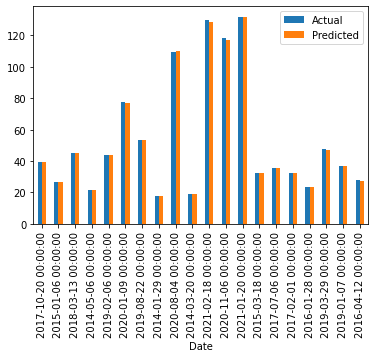

In [63]:
graph=dfr.head(20)
graph.plot(kind='bar')